# PROJET PYTHON: ANALYSIS OF THE BDD ObesityDataSet_raw_and_data_sinthetic 
# LEONARD DEPORTES & ROMAIN GIRODET

Import basic libraries 

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load the data

In [2]:
url = 'https://github.com/Leodespt/Projet_Python/blob/main/ObesityDataSet_raw_and_data_sinthetic.csv?raw=true'
df = pd.read_csv(url)

In [3]:
#os.chdir("P:\ESILV\Année 4\S1\Python for Data Analysis\Projet")
#df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#df = pd.read_csv('C:/Users/leona/Desktop/S7 - ESILV\Python for data analysis/Projet/ObesityDataSet_raw_and_data_sinthetic.csv')

## Study of the database

### Introduction to the database (Romain)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
print('The data shape : ',df.shape)

The data shape :  (2111, 17)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Database presentation

### Data global analysis (comprehension+cleaning) (LEO)

#### Data Cleaning
#### Looking for unusable values 
#### Number of Null or NaN values of each column of the dataset

In [7]:
for column in df.columns:
    print(column+' : ',df[column].isna().sum()+df[column].isnull().sum())

Gender :  0
Age :  0
Height :  0
Weight :  0
family_history_with_overweight :  0
FAVC :  0
FCVC :  0
NCP :  0
CAEC :  0
SMOKE :  0
CH2O :  0
SCC :  0
FAF :  0
TUE :  0
CALC :  0
MTRANS :  0
NObeyesdad :  0


There are no NaN or Null values in the dataset therefore the data are already ready to be used.

#### Proportion for each variable

##### Proportion of male and female in the dataset

In [8]:
male = len(df.loc[df['Gender'] == 'Male'])
female = len(df.loc[df['Gender'] == 'Female'])

print('Number of males : ',male)
print('Number of females : ',female)

print('\nNumber of peoples : ', female+male)

Number of males :  1068
Number of females :  1043

Number of peoples :  2111


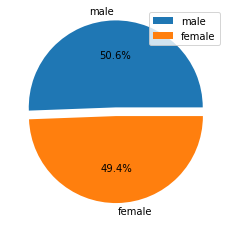

In [9]:
plt.pie([male,female],labels=['male','female'],autopct='%1.1f%%',explode=[0.1,0])
plt.legend()
plt.show()

##### Proportion of smoker and non smoker in the dataset 

In [10]:
smoker = len(df.loc[df['SMOKE'] == 'yes'])
nonsmoker = len(df.loc[df['SMOKE'] == 'no'])

print('Number smokers : ',smoker)
print('Number non smokers : ',nonsmoker)

print('\nNumber of peoples : ', nonsmoker+smoker)

Number smokers :  44
Number non smokers :  2067

Number of peoples :  2111


##### Proportion of people with a family history with overweight in the dataset 

In [11]:
family_history_with_overweight = len(df.loc[df['family_history_with_overweight'] == 'yes'])
family_history_without_overweight = len(df.loc[df['family_history_with_overweight'] == 'no'])

print('Number of people with family history with overweight : ',family_history_with_overweight)
print('Number of people with family history without overweight : ',family_history_without_overweight)

print('\nNumber of peoples : ', family_history_without_overweight+family_history_with_overweight)

Number of people with family history with overweight :  1726
Number of people with family history without overweight :  385

Number of peoples :  2111


##### Proportion of people with calorie’s consumption monitoring in the dataset

In [12]:
SCC_yes = len(df.loc[df['SCC'] == 'yes'])
SCC_no = len(df.loc[df['SCC'] == 'no'])

print('Number of people with a SCC : ',SCC_yes)
print('Number of people without a SCC : ',SCC_no)

print('\nNumber of peoples : ', SCC_no+SCC_yes)

Number of people with a SCC :  96
Number of people without a SCC :  2015

Number of peoples :  2111


##### Proportion of people with frequent consumption of high caloric food in the dataset

In [13]:
FAVC_yes = len(df.loc[df['FAVC'] == 'yes'])
FAVC_no = len(df.loc[df['FAVC'] == 'no'])

print('Number of people with a FAVC : ',FAVC_yes)
print('Number of people without a FAVC : ',FAVC_no)

print('\nNumber of peoples : ', FAVC_no+FAVC_yes)

Number of people with a FAVC :  1866
Number of people without a FAVC :  245

Number of peoples :  2111


##### Summary of the proportion of the 4 yes or no variables (via pieplots)

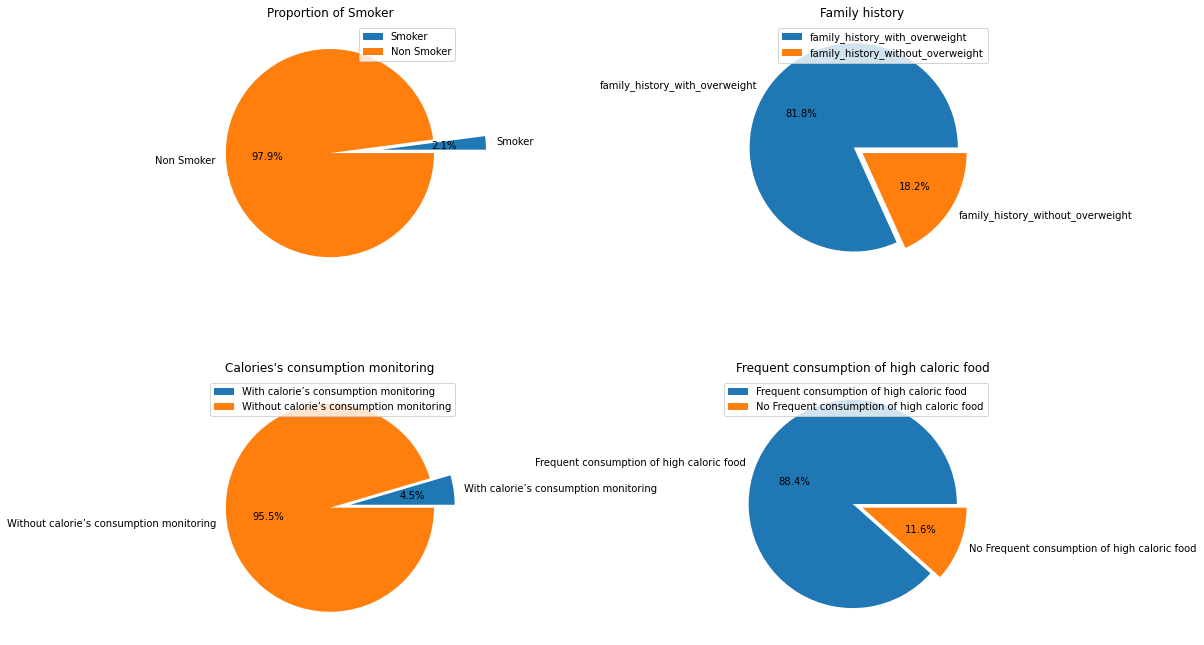

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].pie([smoker,nonsmoker],labels=['Smoker','Non Smoker'], autopct='%1.1f%%',explode=[0.5,0])
ax[0][0].set_title('Proportion of Smoker')

ax[0][1].pie([family_history_with_overweight,family_history_without_overweight],
    labels=['family_history_with_overweight','family_history_without_overweight'], 
    autopct='%1.1f%%',explode=[0.1,0])
ax[0][1].set_title('Family history')

ax[1][0].pie([SCC_yes,SCC_no],
    labels=['With calorie’s consumption monitoring','Without calorie’s consumption monitoring'],
    autopct='%1.1f%%',explode=[0.2,0])
ax[1][0].set_title("Calories's consumption monitoring")

ax[1][1].pie([FAVC_yes,FAVC_no],
    labels=['Frequent consumption of high caloric food','No Frequent consumption of high caloric food'], 
    autopct='%1.1f%%',explode=[0.1,0])
ax[1][1].set_title('Frequent consumption of high caloric food')


ax[0][0].legend() 
ax[0][1].legend() 
ax[1][0].legend() 
ax[1][1].legend() 

plt.tight_layout()

##### Proportion of the different transport used by our dataset

In [15]:
Automobile = len(df.loc[df['MTRANS'] == 'Automobile'])
Motorbike = len(df.loc[df['MTRANS'] == 'Motorbike'])
Bike = len(df.loc[df['MTRANS'] == 'Bike'])
Public_Transportation  = len(df.loc[df['MTRANS'] == 'Public_Transportation'])
Walking = len(df.loc[df['MTRANS'] == 'Walking'])

print('Number Automobile : ', Automobile)
print('Number Motorbike : ',Motorbike)
print('Number Bike : ', Bike)
print('Number Public_Transportation : ',Public_Transportation)
print('Number Walking : ',Walking)

print('\nNumber of peoples : ', Automobile+Motorbike+Bike+Public_Transportation+Walking)

Number Automobile :  457
Number Motorbike :  11
Number Bike :  7
Number Public_Transportation :  1580
Number Walking :  56

Number of peoples :  2111


##### Proportion of consumption of food between meals by our dataset

In [16]:
CAEC_no = len(df.loc[df['CAEC'] == 'no'])
CAEC_Sometimes = len(df.loc[df['CAEC'] == 'Sometimes'])
CAEC_Frequently = len(df.loc[df['CAEC'] == 'Frequently'])
CAEC_Always = len(df.loc[df['CAEC'] == 'Always'])

print('Number of no : ', CAEC_no)
print('Number of Sometimes : ', CAEC_Sometimes)
print('Number of Frequently : ', CAEC_Frequently)
print('Number of Always : ',CAEC_Always)

print('\nNumber of peoples : ', CAEC_no+CAEC_Sometimes+CAEC_Frequently+CAEC_Always)

Number of no :  51
Number of Sometimes :  1765
Number of Frequently :  242
Number of Always :  53

Number of peoples :  2111


##### Proportion of consumption of alcohol by our dataset

In [17]:
CALC_no = len(df.loc[df['CALC'] == 'no'])
CALC_Sometimes = len(df.loc[df['CALC'] == 'Sometimes'])
CALC_Frequently = len(df.loc[df['CALC'] == 'Frequently'])
CALC_Always = len(df.loc[df['CALC'] == 'Always'])

print('Number of no : ', CALC_no)
print('Number of Sometimes : ', CALC_Sometimes)
print('Number of Frequently : ', CALC_Frequently)
print('Number of Always : ',CALC_Always)

print('\nNumber of peoples : ', CALC_no+CALC_Sometimes+CALC_Frequently+CALC_Always)

Number of no :  639
Number of Sometimes :  1401
Number of Frequently :  70
Number of Always :  1

Number of peoples :  2111


##### Proportion of the target variable of our dataset

In [18]:
Insufficient_Weight = len(df.loc[df['NObeyesdad'] == 'Insufficient_Weight'])
Normal_Weight = len(df.loc[df['NObeyesdad'] == 'Normal_Weight'])
Overweight_Level_I = len(df.loc[df['NObeyesdad'] == 'Overweight_Level_I'])
Overweight_Level_II  = len(df.loc[df['NObeyesdad'] == 'Overweight_Level_II'])
Obesity_Type_I = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_I'])
Obesity_Type_II = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_II'])
Obesity_Type_III = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_III'])

print('Number of people with Insufficient Weight : ',Insufficient_Weight)
print('Number of people with Normal Weight : ',Normal_Weight)
print('Number of people with Overweight_Level_I : ', Overweight_Level_I)
print('Number of people with Overweight_Level_II : ',Overweight_Level_II)
print('Number of people with Obesity_Type_I : ',Obesity_Type_I)
print('Number of people with Obesity_Type_II : ',Obesity_Type_II)
print('Number of people with Obesity_Type_III : ',Obesity_Type_III)

print('\nNumber of peoples : ', Insufficient_Weight+Normal_Weight+ Overweight_Level_I+Overweight_Level_II+Obesity_Type_I+Obesity_Type_II+Obesity_Type_III)

Number of people with Insufficient Weight :  272
Number of people with Normal Weight :  287
Number of people with Overweight_Level_I :  290
Number of people with Overweight_Level_II :  290
Number of people with Obesity_Type_I :  351
Number of people with Obesity_Type_II :  297
Number of people with Obesity_Type_III :  324

Number of peoples :  2111


##### Summary of the different variables of the dataset (via barplot)

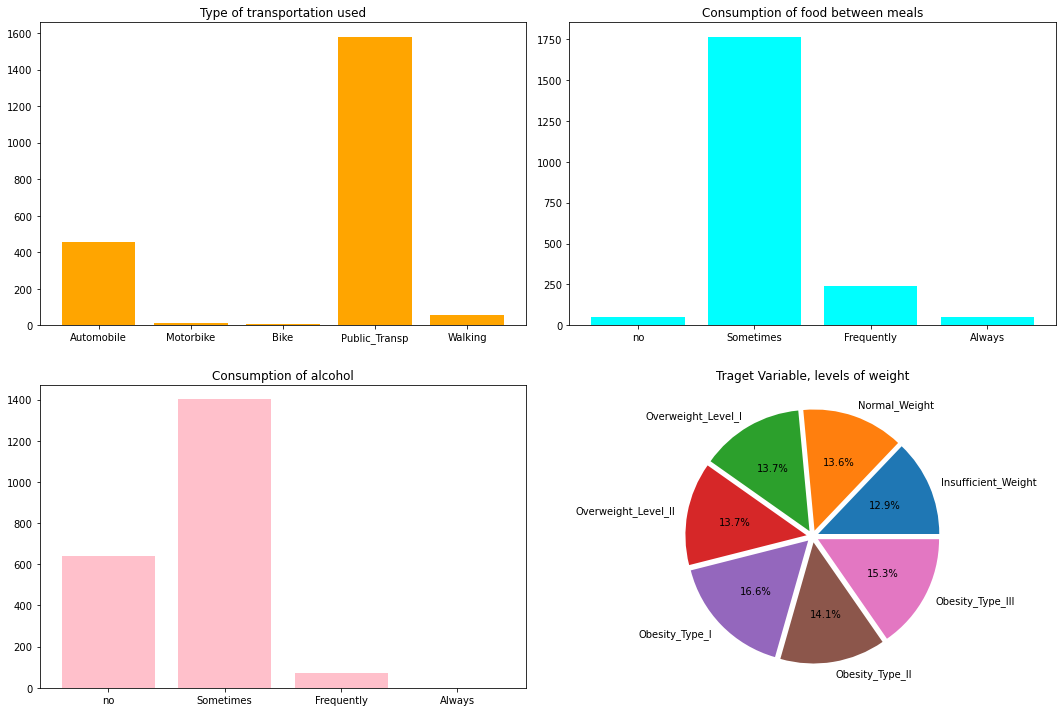

In [19]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].bar(['Automobile','Motorbike','Bike','Public_Transp','Walking'],
    [Automobile,Motorbike,Bike,Public_Transportation,Walking],
    color = 'orange')
ax[0][0].set_title('Type of transportation used')

ax[0][1].bar(['no','Sometimes','Frequently','Always'],
    [CAEC_no,CAEC_Sometimes,CAEC_Frequently,CAEC_Always], 
    color = 'cyan')
ax[0][1].set_title('Consumption of food between meals')

ax[1][0].bar(['no','Sometimes','Frequently','Always'],
    [CALC_no,CALC_Sometimes,CALC_Frequently,CALC_Always], 
    color = 'pink')
ax[1][0].set_title("\nConsumption of alcohol")

ax[1][1].pie([Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III],
    labels=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],
    autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05])
ax[1][1].set_title('\nTraget Variable, levels of weight')

plt.tight_layout()

#### Obesity level according to age, weight and height

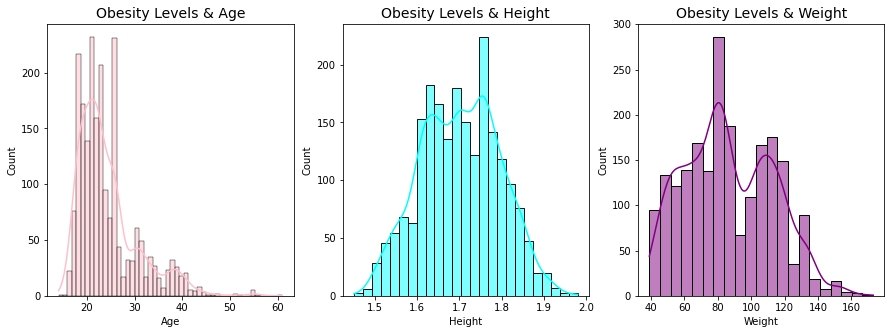

In [20]:
fig, ax = plt.subplots(1, 3 ,figsize =(15,5))

sns.histplot(df['Age'], ax = ax[0] , color = 'pink', kde=True)
ax[0].set_title('Obesity Levels & Age', fontsize = 14)

sns.histplot(df['Height'], ax = ax[1] , color = 'cyan', kde=True)
ax[1].set_title('Obesity Levels & Height' , fontsize = 14)

sns.histplot(df['Weight'], ax = ax[2] , color = 'purple', kde=True)
ax[2].set_title('Obesity Levels & Weight' , fontsize = 14)

plt.show()

______________________________________________________________________________________________________________________________________________________________________________________________________________

#### Correlation Matrix (use of seaborn)

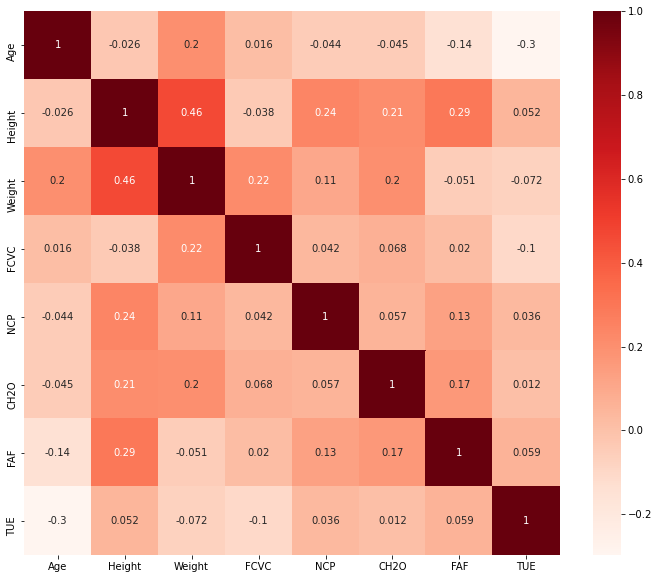

In [21]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

______________________________________________________________________________________________________________________________________________________________________________________________________________

### Data local analysis : studies  of the different obesity type groups (ROMAIN)

Insufficient_Weight
Normal_Weight

Obesity_Type_I
Obesity_Type_II
Obesity_Type_II

Overweight_Level_I	
Overweight_Level_II	

#### VISUALISATION data: Insufficient_Weight

In [93]:
df_Insufficient_Weight=df[df["NObeyesdad"]=="Insufficient_Weight"]
df_Insufficient_Weight

#Condition where remplit les lignes ne respectant pas les conditions avec des NaN, on les supprime ensuite avec dropna(). 
df_Insufficient_Weight=df[["Gender","Age","Height","Weight","family_history_with_overweight"]].where(df["NObeyesdad"]=="Insufficient_Weight").dropna()
df_Insufficient_Weight.head()

,Gender,Age,Height,Weight,family_history_with_overweight
59,Male,20.0,1.76,55.0,yes
71,Female,22.0,1.67,50.0,yes
75,Female,23.0,1.63,45.0,yes
76,Female,24.0,1.60,45.0,yes
83,Female,19.0,1.60,45.0,no


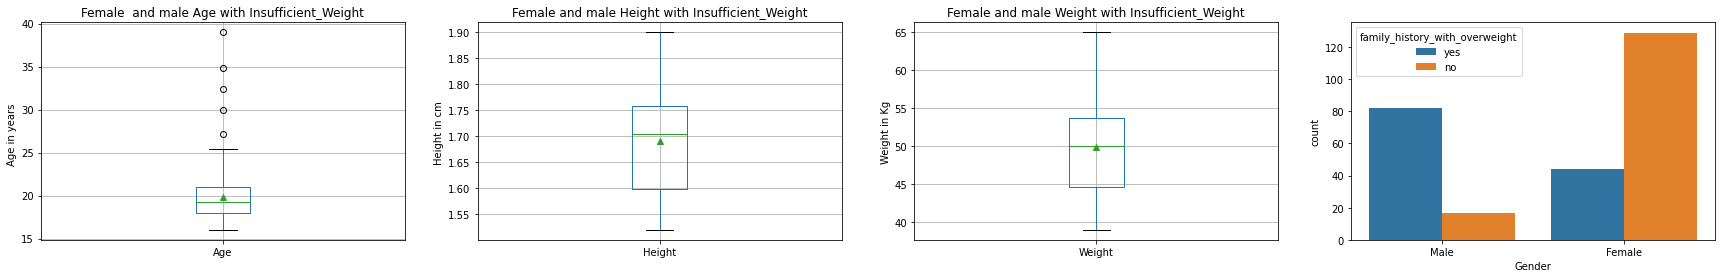

In [94]:
fg, ax =plt.subplots(1,4,figsize=(30,4))
df_Insufficient_Weight.boxplot(df_Insufficient_Weight.columns.tolist()[1],showmeans=True,ax=ax[0])
df_Insufficient_Weight.boxplot(df_Insufficient_Weight.columns.tolist()[2],showmeans=True,ax=ax[1])
df_Insufficient_Weight.boxplot(df_Insufficient_Weight.columns.tolist()[3],showmeans=True,ax=ax[2])


sns.countplot(x="Gender", hue="family_history_with_overweight", data=df_Insufficient_Weight,ax=ax[3])

# df_Insufficient_Weight.groupby(by="Gender").size().plot(kind='bar',color="blue",ax=ax[3])

# df_Insufficient_Weight.groupby(by="family_history_with_overweight").size().plot(kind='bar',color="black",ax=ax[4])

ax[0].set_title('Female  and male Age with Insufficient_Weight')
ax[0].set_ylabel('Age in years  ')

ax[1].set_title('Female and male Height with Insufficient_Weight')
ax[1].set_ylabel('Height in cm ')

ax[2].set_title('Female and male Weight with Insufficient_Weight')
ax[2].set_ylabel('Weight in Kg')

plt.show()

#### Insufficient_Weight concerning female

Text(0, 0.5, 'Weight in Kg')

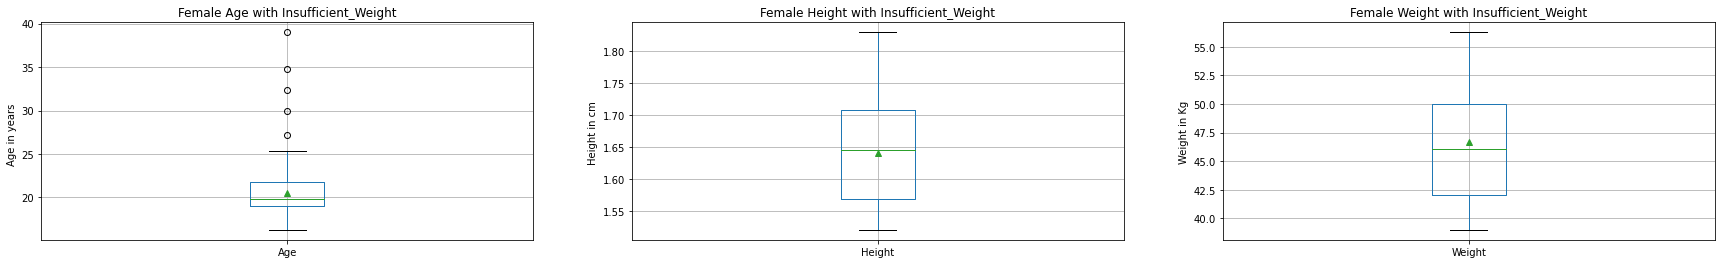

In [95]:
df_Insufficient_Weight_Female=df_Insufficient_Weight[["Age","Height","Weight","family_history_with_overweight"]].where(df_Insufficient_Weight["Gender"]=="Female").dropna()

fg, ax =plt.subplots(1,3,figsize=(30,4))
df_Insufficient_Weight_Female.boxplot(df_Insufficient_Weight_Female.columns.tolist()[0],showmeans=True,ax=ax[0])
df_Insufficient_Weight_Female.boxplot(df_Insufficient_Weight_Female.columns.tolist()[1],showmeans=True,ax=ax[1])
df_Insufficient_Weight_Female.boxplot(df_Insufficient_Weight_Female.columns.tolist()[2],showmeans=True,ax=ax[2])

ax[0].set_title('Female Age with Insufficient_Weight')
ax[0].set_ylabel('Age in years  ')

ax[1].set_title('Female Height with Insufficient_Weight')
ax[1].set_ylabel('Height in cm ')

ax[2].set_title('Female Weight with Insufficient_Weight')
ax[2].set_ylabel('Weight in Kg')

#### Insufficient_Weight concerning male

Text(0, 0.5, 'Weight in Kg')

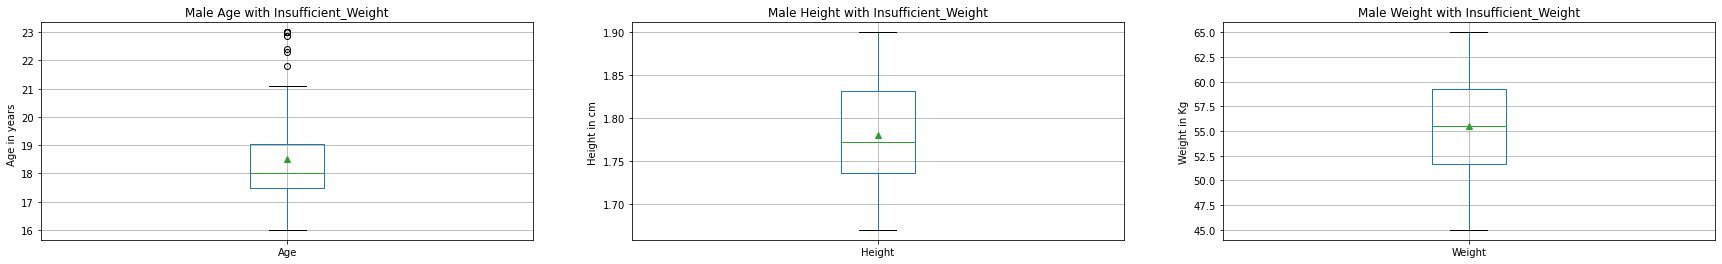

In [96]:
df_Insufficient_Weight_Male=df_Insufficient_Weight[["Age","Height","Weight","family_history_with_overweight"]].where(df_Insufficient_Weight["Gender"]=="Male").dropna()

fg, ax =plt.subplots(1,3,figsize=(30,4))
df_Insufficient_Weight_Male.boxplot(df_Insufficient_Weight_Male.columns.tolist()[0],showmeans=True,ax=ax[0])
df_Insufficient_Weight_Male.boxplot(df_Insufficient_Weight_Male.columns.tolist()[1],showmeans=True,ax=ax[1])
df_Insufficient_Weight_Male.boxplot(df_Insufficient_Weight_Male.columns.tolist()[2],showmeans=True,ax=ax[2])

ax[0].set_title('Male Age with Insufficient_Weight')
ax[0].set_ylabel('Age in years  ')

ax[1].set_title('Male Height with Insufficient_Weight')
ax[1].set_ylabel('Height in cm ')

ax[2].set_title('Male Weight with Insufficient_Weight')
ax[2].set_ylabel('Weight in Kg')

______________________________________________________________________________________________________________________________________________________________________________________________________________

# Classification of the type of Obesity

### First step : turn the qualitative data into quantitative data : Data encodage

#### Manual encodage (LEO)

Gender 
* male = 0
* female = 1

In [97]:
df.Gender.replace(('Male','Female'),(1,2), inplace = True)

Family_history_with_overweight

FCHCF (Frequent consumption of high caloric food)

SMOKE

SCC (Calorie’s consumption monitoring)

- yes = 1
- no = 0

In [98]:
df.family_history_with_overweight.replace(('yes','no'),(1,0), inplace = True)
df.FAVC.replace(('yes','no'),(1,0), inplace = True)
df.SMOKE.replace(('yes','no'),(1,0), inplace = True)
df.SCC.replace(('yes','no'),(1,0), inplace = True)

CAEC (Consumption of food between meals)

CALC (Consumption of alcohol)
* no = 0
* Sometimes = 1
* Frequently = 2
* Always = 3

In [99]:
df.CAEC.replace(('no','Sometimes','Frequently','Always'),(0,1,2,3), inplace = True)
df.CALC.replace(('no','Sometimes','Frequently','Always'),(0,1,2,3), inplace = True)

MTRANS (Transportation used)
* Automobile = 0
* Motorbike = 1
* Bike = 2
* Public_Transportation = 3
* Walking = 4

In [100]:
df.MTRANS.replace(('Automobile','Motorbike','Bike','Public_Transportation','Walking'),(0,1,2,3,4), inplace = True)

NObeyesdad (target variable) 
* Insufficient Weight = 0
* Normal Weight = 1
* Overweight level I = 2
* Overweight level II = 3
* Obesity Type I = 4 
* Obesity type II = 5
* Obesity Type III = 6.


In [101]:
df.NObeyesdad.replace(('Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),(0,1,2,3,4,5,6), inplace = True)

In [102]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,2,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


#### Ordinal Encodage (ROMAIN)

In [103]:
#est-ce que le fait d'utiliser deux fois fit_transform crée des problèmes ?
# bien comprendre le fir et transform
#essayer de seulement transforme les testValue

#from sklearn import preprocessing

#lab_enc = preprocessing.LabelEncoder()
#ord_enc=preprocessing.OrdinalEncoder(handle_unknown = 'ignore')

# train_lab_enc=lab_enc.fit(Y_train)
# train_ord_enc=ord_enc.fit(X_train)

#Y_train_encoded = lab_enc.fit_transform(Y_train)
#X_train_encoded=ord_enc.fit_transform(X_train)

#Y_test_encoded = lab_enc.transform(Y_test)
#X_test_encoded=ord_enc.transform(X_test)

#si j'applique handle_unknown = 'ignore' le code compile mais le score passe de 0.18 à 0.25, il est encore plus mauavais car ignore les autres valeures ? 




#### OneHotEncodage

In [104]:
#OneHot=preprocessing.OneHotEncoder()

#Y_train_OneHot = lab_enc.fit_transform(Y_train)
#X_train_OneHot=ord_enc.fit_transform(X_train)

#Y_test_OneHot = lab_enc.fit_transform(Y_test)
#X_test_OneHot=ord_enc.fit_transform(X_test)


### Second step : Split the data into a training set and a test set

In [105]:
from sklearn.model_selection import train_test_split

In [114]:
Y=df["NObeyesdad"]
X=df.loc[:,df.columns!="NObeyesdad"]

#avant de séparer on mélange avec random_state

X_train, X_test,Y_train,Y_test=train_test_split(X, Y, test_size= 0.33,random_state=4)

print( '\ntrain set', X_train.shape,'test set', X_test.shape)
print( '\ntrain set', Y_train.shape,'test set', Y_test.shape)


train set (1414, 16) test set (697, 16)

train set (1414,) test set (697,)


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Third step : Test the different classifier : K-neighbors and SVC

#### K-neighbors

matrice correlation 

quels sont les differents coeficient de chaque paramètres ?
 Les plus importants pour chaque groupes ?

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
model_k=KNeighborsClassifier()
model_k.fit(X_train,Y_train)

print("train score: ",model_k.score(X_train,Y_train))
print("test score: ",model_k.score(X_test,Y_test))

train score:  0.864922206506365
test score:  0.812051649928264


In [110]:
#model=KNeighborsClassifier()
#model.fit(X_train_encoded,Y_train_encoded)

#print("train score: ",model.score(X_train_encoded,Y_train_encoded))
#print("test score: ",model.score(X_test_encoded,Y_test_encoded))

#Le test score est faible... pk ?
# overfitting/surapprentissage ?

In [111]:
#model_OneHot=KNeighborsClassifier()
#model_OneHot.fit(X_train_OneHot,Y_train_OneHot)

#print("train score: ",model_OneHot.score(X_train_OneHot,Y_train_OneHot))
#print("test score: ",model_OneHot.score(X_test_OneHot,Y_test_OneHot))

#meme probleme 

#### SVC : Support Vector Classification

In [112]:
from sklearn.svm import SVC

In [113]:
model_svc=SVC()
model_svc.fit(X_train,Y_train)

print("train score: ",model_svc.score(X_train,Y_train))
print("test score: ",model_svc.score(X_test,Y_test))

train score:  0.9384724186704385
test score:  0.8723098995695839


## Conclusion of our studies